# Data Loading & Read Clean File

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# Import general library
import numpy as np # linear algebra
from numpy import sqrt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import datetime as dt

# Import sklearn model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Import statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import warnings
warnings.filterwarnings('ignore')

# Import other modelling module
from fbprophet import Prophet

In [2]:
sample_submission = pd.read_csv('../data_local/sample_submission.csv')
test_input = pd.read_csv('../data_local/test.csv')
normData = pd.read_csv('predictFutureSalesClean.csv')
normData_No_Exclude = pd.read_csv('predictFutureSalesClean_No_Exclude_Item.csv')

In [3]:
normData

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
0,0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0
1,1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
2,2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
3,3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
4,4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0
1442560,1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0
1442561,1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0
1442562,1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0


In [4]:
# get rid of Unname column
normData.drop(normData.filter(regex="Unname"),axis=1, inplace=True)
normData

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0
1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0
1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0
1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0
1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0


# Data Prep for Prediction

In [5]:
#add more columns for feature engineering
all_data = normData
all_data['date'] = pd.to_datetime(all_data.date, format='%Y.%m.%d')
all_data['year_month'] = all_data.date.dt.strftime("%Y%m")
all_data['date_week'] = all_data.date.dt.week
all_data['dayofweek_name'] = all_data.date.dt.day_name()
all_data['dayofweek_no'] = all_data.date.dt.dayofweek 
all_data['wrk_week'] = np.where(all_data['date_year']==2013, 
                                all_data['date_week'], 
                        np.where(all_data['date_year']==2014, 
                                all_data['date_week']+52, 
                                all_data['date_week']+104))

# get rid of Unname column
all_data.drop(all_data.filter(regex="Unname"),axis=1, inplace=True)

In [6]:
all_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales,year_month,date_week,dayofweek_name,dayofweek_no,wrk_week
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0,201301,1,Wednesday,2,1
1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0,201301,1,Thursday,3,1
2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0,201301,1,Saturday,5,1
3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0,201301,2,Monday,0,2
4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0,201301,2,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0,201510,41,Saturday,5,145
1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0,201510,41,Friday,4,145
1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0,201510,42,Wednesday,2,146
1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0,201510,43,Thursday,3,147


In [7]:
itemCntDayGrouped = all_data.groupby(['item_id','shop_id','date_block_num'])[['item_cnt_day']].agg('sum').reset_index()

In [8]:
itemCntDayGrouped

,item_id,shop_id,date_block_num,item_cnt_day
0,30,0,1,31.0
1,30,1,1,10.0
2,30,2,2,1.0
3,30,2,5,1.0
4,30,2,15,1.0
...,...,...,...,...
704107,22167,58,14,1.0
704108,22167,58,20,1.0
704109,22167,59,9,1.0
704110,22167,59,11,2.0


In [9]:
#Populate a list of required product and shop for kaggle submission
#This code will ensure that all the product and shop to be available
#in the data frame regardless there are sales/item count or not. 
testTemp=test_input.drop(columns=['ID']).reset_index()

#Recreate a empty data frame
salesTable=pd.DataFrame({'date_block_num':[0],'shop_id':[0],'item_id':[0]})

# Populate item_cnt_month for each item and shop id
for i in range(34):  
    testTemp['date_block_num']=i
    testTemp2=testTemp.set_index(['date_block_num','shop_id','item_id'])
    salesPPX=itemCntDayGrouped[itemCntDayGrouped.date_block_num==i].set_index(['date_block_num','shop_id','item_id'])
    testTemp2=testTemp2.join(salesPPX).reset_index().fillna(0)
    salesTable=salesTable.append(testTemp2)
    

In [10]:
salesTable= salesTable.drop('index',axis=1)

#Add Test Data month 34 as well
test_data=test_input.reset_index().drop(columns=['ID'])
test_data['date_block_num']=34


salesTable=salesTable.append(test_data).fillna(0)
salesTable.drop(columns=['index'])
normData_for_pred = salesTable


In [11]:
# get rid of Unname column & Dataframe cleaning
normData_for_pred.drop(normData_for_pred.filter(regex="Unname"),axis=1, inplace=True)
normData_for_pred =normData_for_pred[['date_block_num','shop_id','item_id','item_cnt_day']]
normData_for_pred = normData_for_pred.rename({'item_cnt_day':'item_cnt_month'},axis=1)
normData_for_pred

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,0,0.0
0,0,5,5037,0.0
1,0,5,5320,0.0
2,0,5,5233,0.0
3,0,5,5232,0.0
...,...,...,...,...
214195,34,45,18454,0.0
214196,34,45,16188,0.0
214197,34,45,15757,0.0
214198,34,45,19648,0.0


In [12]:
normData_for_pred = normData_for_pred[1:]
normData_for_pred

,date_block_num,shop_id,item_id,item_cnt_month
0,0,5,5037,0.0
1,0,5,5320,0.0
2,0,5,5233,0.0
3,0,5,5232,0.0
4,0,5,5268,0.0
...,...,...,...,...
214195,34,45,18454,0.0
214196,34,45,16188,0.0
214197,34,45,15757,0.0
214198,34,45,19648,0.0


## QC dataframe for 1 top sales item

In [15]:
norm_6675= normData_for_pred.loc[(normData_for_pred['item_id']==6675)]
norm_6675

,date_block_num,shop_id,item_id,item_cnt_month
4058,0,5,6675,0.0
9158,0,4,6675,0.0
14258,0,6,6675,0.0
19358,0,3,6675,0.0
24458,0,2,6675,0.0
...,...,...,...,...
192758,34,46,6675,0.0
197858,34,41,6675,0.0
202958,34,44,6675,0.0
208058,34,39,6675,0.0


In [58]:
norm_3731= normData_for_pred.loc[(normData_for_pred['item_id']==3731)]
norm_3731

,date_block_num,shop_id,item_id,item_cnt_month
54,0,5,3731,0.0
5154,0,4,3731,0.0
10254,0,6,3731,0.0
15354,0,3,3731,0.0
20454,0,2,3731,0.0
...,...,...,...,...
188754,34,46,3731,0.0
193854,34,41,3731,0.0
198954,34,44,3731,0.0
204054,34,39,3731,0.0


In [118]:
normData_for_pred

,date_block_num,shop_id,item_id,item_cnt_month
0,0,5,5037,0.0
1,0,5,5320,0.0
2,0,5,5233,0.0
3,0,5,5232,0.0
4,0,5,5268,0.0
...,...,...,...,...
214195,34,45,18454,0.0
214196,34,45,16188,0.0
214197,34,45,15757,0.0
214198,34,45,19648,0.0


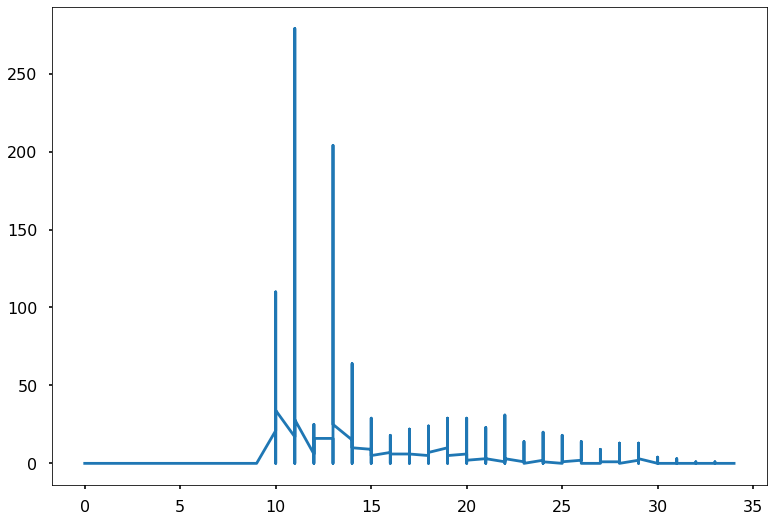

In [36]:
# Visualize the data

x= norm_6675['date_block_num']
y= norm_6675['item_cnt_month']

plt.plot(x,y)
plt.show()

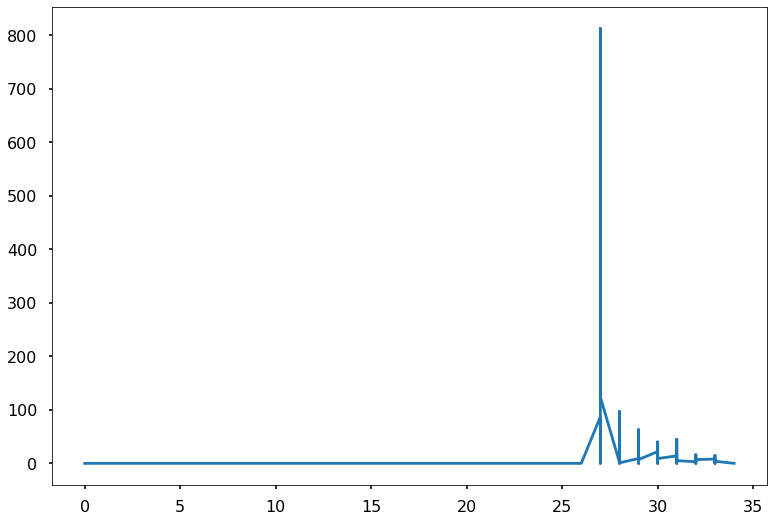

In [37]:
# Visualize the data

x= norm_3731['date_block_num']
y= norm_3731['item_cnt_month']

plt.plot(x,y)
plt.show()

# Data Decomposition (General)

In [6]:
# Only keep date & item_cnt_day
Forecast_IP = normData[['date','item_cnt_day']]
Forecast_IP['date'] = pd.to_datetime(Forecast_IP['date'])
# Set date as index
Forecast_IP = Forecast_IP.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_weekly = Forecast_IP['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_weekly

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,item_cnt_day
date,
2013-01-06,7891.0
2013-01-13,6505.0
2013-01-20,5755.0
2013-01-27,6125.0
2013-02-03,5551.0
...,...
2015-10-04,17857.0
2015-10-11,12808.0
2015-10-18,14922.0


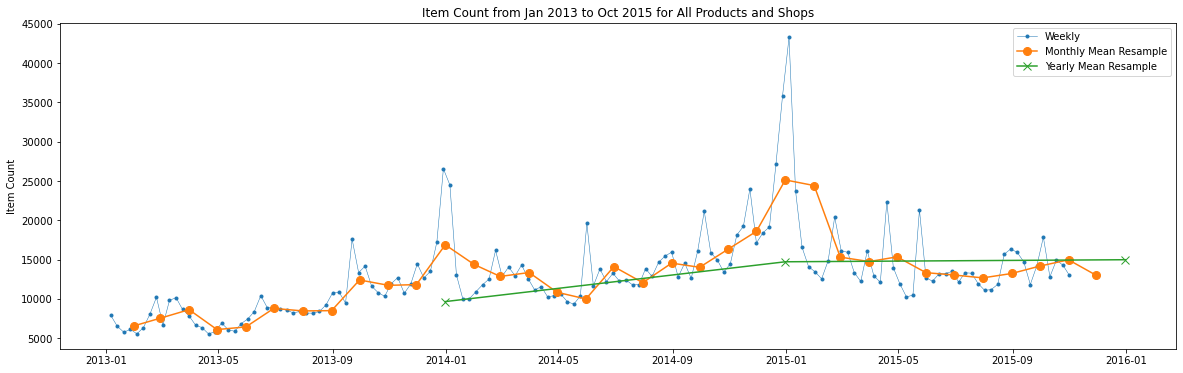

In [7]:
y = Forecast_IP_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for All Products and Shops')
ax.legend();

In [8]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

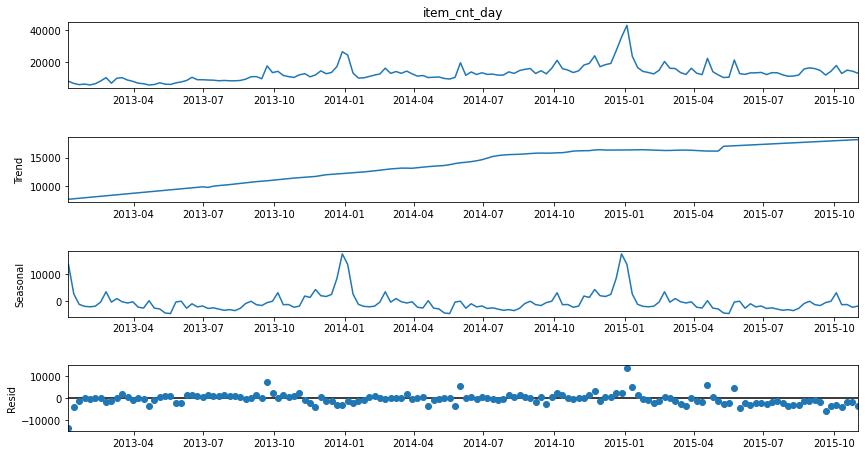

In [9]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend increasing from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January. Seasonality and trend observed.

# Data Decomposition (Categorize by Item Category ID)

In [59]:
normData_filtered = normData[['date','item_cnt_day','item_category_id']]

In [61]:
#create unique list of names
UniqueNames = normData_filtered.item_category_id.unique()

#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueNames}

for key in df.keys():
    df[key] = normData_filtered[:][normData_filtered.item_category_id == key]

In [62]:
count=0
for elem in df:
    count+=1
print('Total Item Category is {}'.format(count))

Total Item Category is 60


In [63]:
# Only keep date & item_cnt_day
Forecast_IP_item20 = df[20][['date','item_cnt_day']]
Forecast_IP_item20['date'] = pd.to_datetime(Forecast_IP_item20['date'])
# Set date as index
Forecast_IP_item20 = Forecast_IP_item20.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_item20_weekly = Forecast_IP_item20['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_item20_weekly

,item_cnt_day
date,
2013-11-24,65.00000000
2013-12-01,1680.00000000
2013-12-08,725.00000000
2013-12-15,453.00000000
2013-12-22,792.00000000
...,...
2015-10-04,941.00000000
2015-10-11,1233.00000000
2015-10-18,1436.00000000


In [10]:
## Validate the start date of item category 20
df_validate = normData.loc[normData['item_category_id']==20]
df_validate= df_validate.sort_values(by='date')
df_validate

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
288906,2013-11-22,10,56,4271,2799.0,1.0,"Чехов ТРЦ ""Карнавал""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269326,2013-11-22,10,26,4231,2518.9,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5037.8
274310,2013-11-22,10,31,4271,2799.0,1.0,"Москва ТЦ ""Семеновский""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269338,2013-11-22,10,26,4271,2799.0,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
289768,2013-11-22,10,54,4231,2799.0,2.0,"Химки ТЦ ""Мега""","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402785,2015-10-31,33,35,10202,1199.0,1.0,"Н.Новгород ТРЦ ""Фантастика""","Ведьмак 3: Дикая Охота - Дополнение ""Каменные ...",20,True,Игры - PS4,10,2015,1199.0
1404700,2015-10-31,33,57,7224,4499.0,1.0,"Якутск Орджоникидзе, 56",Uncharted: Натан Дрейк. Коллекция. Специальное...,20,True,Игры - PS4,10,2015,4499.0
1437795,2015-10-31,33,21,1586,5999.0,1.0,"Москва МТРЦ ""Афи Молл""","Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,True,Игры - PS4,10,2015,5999.0
1420869,2015-10-31,33,18,7223,3999.0,2.0,"Красноярск ТЦ ""Июнь""","Uncharted: Натан Дрейк. Коллекция [PS4, русска...",20,True,Игры - PS4,10,2015,7998.0


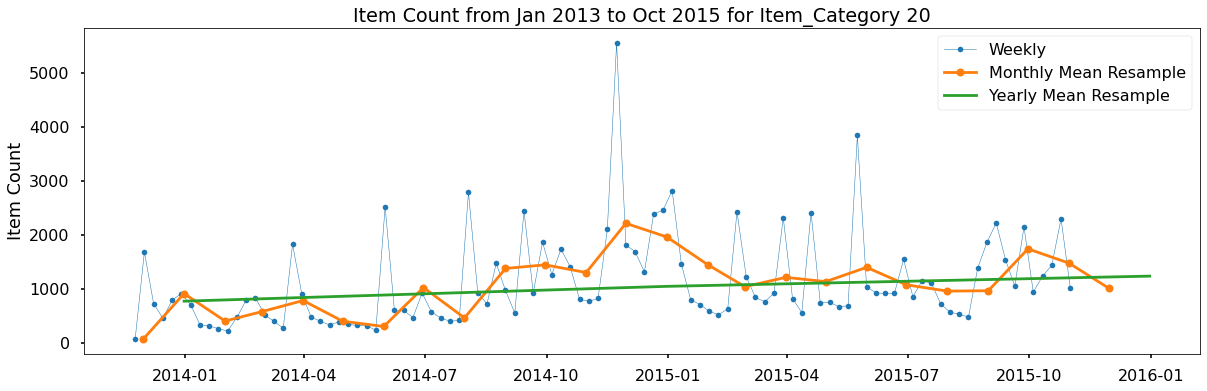

In [64]:
y = Forecast_IP_item20_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for Item_Category 20')
ax.legend();

In [40]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


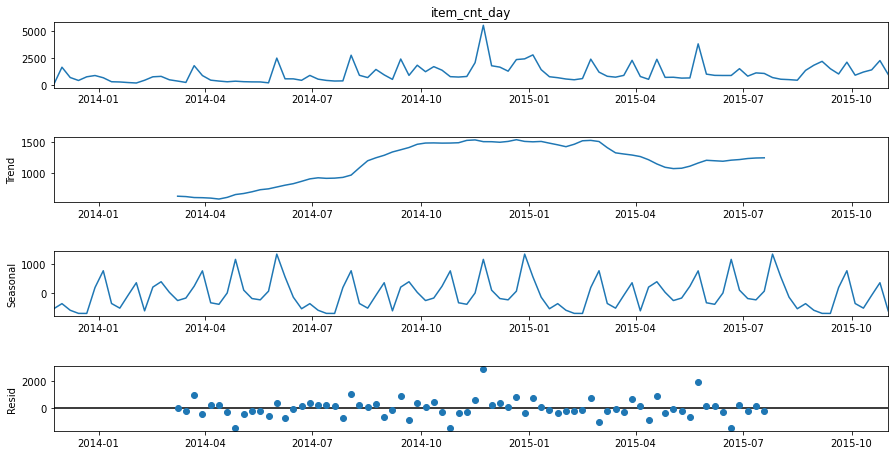

In [17]:
seasonal_decompose(y)

From observation, trend and  seasonality observed for item 20. 
Residual: also call noise, is the residual of original time series after seasonal and trend series are removed.

# Data Decomposition (Item ID)

In [37]:
norm_6675 = norm_6675[['date_block_num','item_cnt_month']]
norm_6675

,date_block_num,item_cnt_month
4058,0,0.00
9158,0,0.00
14258,0,0.00
19358,0,0.00
24458,0,0.00
...,...,...
192758,34,0.00
197858,34,0.00
202958,34,0.00
208058,34,0.00


In [38]:
norm_6675 = norm_6675.set_index('date_block_num')
norm_6675

,item_cnt_month
date_block_num,
0,0.00
0,0.00
0,0.00
0,0.00
0,0.00
...,...
34,0.00
34,0.00
34,0.00


In [39]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

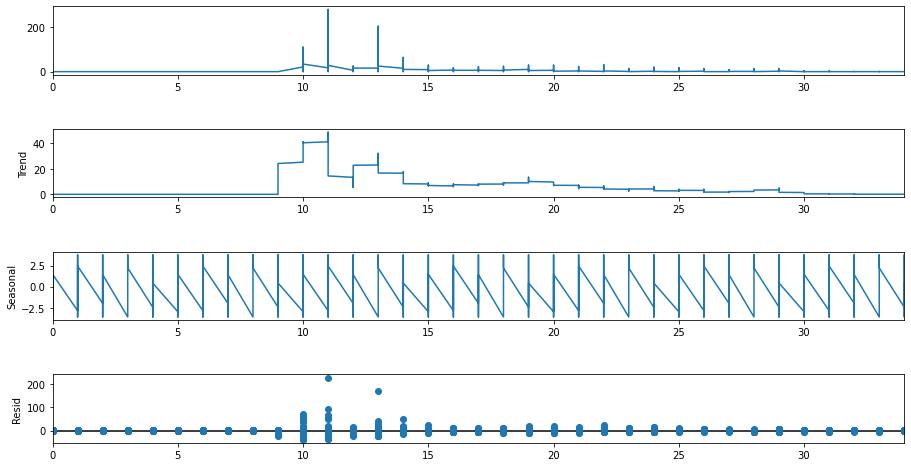

In [40]:
seasonal_decompose(norm_6675)

Monthly seasonality was observed in this example.

# Parameter Optimzation for SARIMA & ARIMA

## Autogrid search for SARIMA parameter

In [170]:
norm_6675

,item_cnt_month
date_block_num,
0,0.0
0,0.0
0,0.0
0,0.0
0,0.0
...,...
34,0.0
34,0.0
34,0.0


Parameters:

trend elements:
p: Trend autoregression order
d: Trend difference order
q: Trend moving average order

Seasonal Elements
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In order to get the best prediction, it’s important to find the values of SARIMA(p,d,q)(P,D,Q)m that optimize a metric of interest. In this example, we just use a "grid search" to iteratively explore different combinations of parameters.


Evaluation metric for this grid search is AIC (Akaike Information Criterion), that measure how well fit a model to overall model complexity. This help to choose the optimize parameterization for SARIMAX modelling with lowest AIC value.

AIC is an estimator to evaluate the relative quality of statistical models for given dataset. It provides means for model selection.

In [192]:
## Auto search function for SARIMAX function - check with one top sale item

import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

Monthly seasoal pattern was observed from the data decomposition above. Thus, the frequency of seasonality is 12 in this case.

In [193]:
sarima_grid_search(norm_6675,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:12330.826503510661
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:12065.241212570403
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:12490.88958926429
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:11767.18009442848
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:11987.582558372276
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:11827.485220089182
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:12086.257403007969
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:11766.13227540812
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:12071.81429721606
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:11911.546875802374
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:12464.60296304169
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:11650.848267297468
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:11885.34585551943
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:11715.602403601462
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:12012.796511954713
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:11652.803084568586
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:12254.051794726825
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:12161.757538720794
SARIMA(0, 1, 0)x

## ACF & PACF

In [41]:
# prep data for acf & pacf plot
#lag feature 

all_data_by_day = all_data
aggregations = {'total_sales':'sum'}
all_data_by_day = all_data_by_day.groupby(['date'], as_index=False).agg(aggregations)
all_data_by_day['lag_1'] = all_data_by_day['total_sales'].shift(1)
all_data_by_day['lag_2'] = all_data_by_day['total_sales'].shift(2)
all_data_by_day['lag_3'] = all_data_by_day['total_sales'].shift(3)
all_data_by_day['lag_4'] = all_data_by_day['total_sales'].shift(4)
all_data_by_day['lag_5'] = all_data_by_day['total_sales'].shift(5)
all_data_by_day['lag_6'] = all_data_by_day['total_sales'].shift(6)
all_data_by_day['lag_7'] = all_data_by_day['total_sales'].shift(7)
all_data_by_day

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,"286,395.59",nan,nan,nan,nan,nan,nan,nan
1,2013-01-02,"1,258,654.76","286,395.59",nan,nan,nan,nan,nan,nan
2,2013-01-03,"1,131,019.36","1,258,654.76","286,395.59",nan,nan,nan,nan,nan
3,2013-01-04,"965,669.29","1,131,019.36","1,258,654.76","286,395.59",nan,nan,nan,nan
4,2013-01-05,"955,022.60","965,669.29","1,131,019.36","1,258,654.76","286,395.59",nan,nan,nan
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,"2,211,635.13","1,882,246.16","3,412,849.00","4,040,446.00","6,107,958.00","2,480,586.00","2,289,480.00","2,659,223.80"
1030,2015-10-28,"1,696,390.10","2,211,635.13","1,882,246.16","3,412,849.00","4,040,446.00","6,107,958.00","2,480,586.00","2,289,480.00"
1031,2015-10-29,"1,822,707.40","1,696,390.10","2,211,635.13","1,882,246.16","3,412,849.00","4,040,446.00","6,107,958.00","2,480,586.00"
1032,2015-10-30,"2,551,906.12","1,822,707.40","1,696,390.10","2,211,635.13","1,882,246.16","3,412,849.00","4,040,446.00","6,107,958.00"


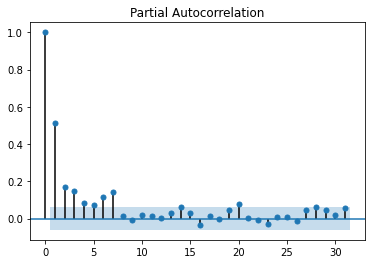

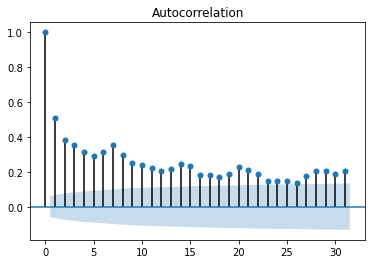

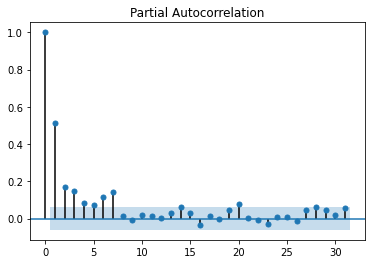

In [46]:
plot_acf(all_data_by_day['total_sales'])
plot_pacf(all_data_by_day['total_sales'])

The ACF & PACF plots helps to give intuition on Autoregressive(AR) and Moving Average (MA) term with a lag of k. The ACF & PACF plots above is showing the relationship of time series on total sales. From PACF plot, the correlation effect is strong at lag 1, and sharp decline afterwards.

This is tally with the autogrid search that we will apply both AR and MA term at lag 1.

# Modelling

In [13]:
normData_filtered = normData_for_pred[['date_block_num','item_cnt_month','item_id']]

In [14]:
normData_filtered

,date_block_num,item_cnt_month,item_id
0,0,0.0,5037
1,0,0.0,5320
2,0,0.0,5233
3,0,0.0,5232
4,0,0.0,5268
...,...,...,...
214195,34,0.0,18454
214196,34,0.0,16188
214197,34,0.0,15757
214198,34,0.0,19648


In [15]:
def data_split(data, ratio=None):
    if ratio == None:
        ratio = ratio
    
    train_size = int(len(data) * ratio)
    test_size = int(len(data))-train_size
    train, test = data.iloc[: train_size], data.iloc[train_size:]
    
        
    return train,test,train_size,test_size

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true+1e-6)) * 100
    
    if type(mape) == pd.Series: mape = mape[0]
    return mape

def metrics_score(original, predict, model=None):
    rmse = sqrt(mean_squared_error(original, predict))
    mae = mean_absolute_error(original, predict)
    mape = mean_absolute_percentage_error(original, predict)
    r2score = r2_score(original, predict)
        
    metrics = dict (MAE=mae, MAPE=mape, R2_Score=r2score, RMSE=rmse)
    return metrics

def pred_line_plot(actual, pred, title=None):
    plt.style.use('seaborn-poster')
    plt.figure()
    plt.plot(actual, label='Original')
    plt.plot(pred, ls='--', label='Predicted')
    plt.legend(loc='best')
    plt.title(title)
    plt.show()
    
    return plt

model_var = ['date_block_num','item_cnt_month']


In [16]:
def stationarity_test(timeseries, critical_value=0.05):
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    t_stats = dftest[0]
    p_value = dftest[1]
    critical_value = critical_value
    
    return t_stats, p_value, critical_value

In [17]:
model_SARIMA = pd.DataFrame()
model_ARIMA = pd.DataFrame()


def forecast_model(data, model=None):  
        
    df = data[model_var]
    df = df.set_index('date_block_num')
  
    # Check data stationarity, apply detrending and differenceing if data is non stationary
    
    t_stats, p_value, critical_value = stationarity_test(df["item_cnt_month"], critical_value=0.05)
    if p_value <= critical_value:
        df["item_cnt_month"] = df["item_cnt_month"]
    elif p_value > critical_value:
        df["item_cnt_month"]  =  (df["item_cnt_month"]  - df["item_cnt_month"] .rolling(window=12).mean())/df["item_cnt_month"] .rolling(window=12).std()
        df["item_cnt_month"] = df["item_cnt_month"] - df["item_cnt_month"].shift(12)

    # Output function for train test split
    train,test,train_size,test_size = data_split(df, ratio=0.6)

    # Make the train test into list for plotting
    indexedtrain = pd.DataFrame(train)
    indexedtest = pd.DataFrame(test)

    datatrain = list(indexedtrain.item_cnt_month.values)
    datatest = list(indexedtest.item_cnt_month.values)

    # Get the index for month 34 only

    indexedtest1 = indexedtest.reset_index()
    id_x = indexedtest1['date_block_num'].loc[lambda x: x==34].index
    
    # Miscellaneous
    history = train['item_cnt_month']
    prediction_list = []
    actual_test = None
    
    
    # modelling
    if model == "SARIMAX":          
        model = SARIMAX(train,
                 order=(1,0,1),
                 seasonal_order=(0,1,1,12))
        model_fit = model.fit(disp=False)
        pred = model_fit.predict(start=train_size, end=len(df)-1)
        prediction_list = prediction_list.append(pred.values)
        model = model
        indexedpred = pd.DataFrame(pred)
        pred_34 = indexedpred[id_x[0]:len(indexedpred)-2]
        pred_34 = pred_34.rename({'predicted_mean':'item_cnt_month'},axis=1)
        history.append(test)
     
    elif model == "ARIMA":
        model = ARIMA(train, order=(1,0,1))
        model_fit = model.fit(disp=False)
        pred = model_fit.predict(start=train_size, end=len(df)-1)
        prediction_list = prediction_list.append(pred.values)
        model = model
        indexedpred= pd.DataFrame(pred)
        pred_34 = indexedpred[id_x[0]:len(indexedpred)-2]
        pred_34 = pred_34.rename({0:'item_cnt_month'},axis=1)
        history.append(test)
      
    # Metrics Evaluation
    metrics = metrics_score(test, pred, model=model)

    metrics["p-value"] = p_value
    if p_value <= critical_value:
        metrics["stationarity"] = 1
    elif p_value > critical_value:
        metrics["stationarity"] = 0 

    
    return history, train, test, pred, metrics,datatrain, pred_34, model

In [24]:
pd.options.display.float_format = '{:,.0f}'.format
# norm_item = normData_filtered[normData_filtered['item_id'].isin([17717])]
norm_item = normData_filtered[normData_filtered['item_id'].isin([6675,5823,17717,13405,2808,16787,3733,3734,13443,3732])]
norm_item

,date_block_num,item_cnt_month,item_id
22,0,0,5823
99,0,0,3732
100,0,0,3733
274,0,0,17717
921,0,0,2808
...,...,...,...
210021,34,0,2808
210113,34,0,3734
210352,34,0,13405
210598,34,0,16787


In [25]:
norm_item.shape

(13230, 3)

In [26]:
for item_id, data in normData_filtered.groupby("item_id"):
    if data.shape[0] != 0:
        print("{} ok".format(item_id))
    elif data.shape[0] == 0:
        print("{} not ok".format(item_id))

30 ok
31 ok
32 ok
33 ok
38 ok
42 ok
45 ok
51 ok
53 ok
57 ok
59 ok
62 ok
64 ok
67 ok
69 ok
70 ok
72 ok
76 ok
80 ok
83 ok
88 ok
91 ok
93 ok
109 ok
138 ok
140 ok
149 ok
153 ok
154 ok
166 ok
168 ok
173 ok
180 ok
202 ok
204 ok
205 ok
213 ok
226 ok
234 ok
237 ok
248 ok
249 ok
253 ok
254 ok
259 ok
269 ok
302 ok
308 ok
313 ok
315 ok
325 ok
342 ok
353 ok
356 ok
388 ok
402 ok
407 ok
408 ok
413 ok
421 ok
428 ok
430 ok
445 ok
448 ok
454 ok
464 ok
473 ok
474 ok
477 ok
478 ok
480 ok
482 ok
486 ok
491 ok
492 ok
494 ok
496 ok
502 ok
503 ok
504 ok
505 ok
508 ok
515 ok
521 ok
524 ok
528 ok
536 ok
539 ok
544 ok
547 ok
560 ok
562 ok
563 ok
566 ok
568 ok
571 ok
578 ok
583 ok
585 ok
592 ok
616 ok
638 ok
639 ok
640 ok
649 ok
650 ok
652 ok
653 ok
655 ok
656 ok
663 ok
676 ok
680 ok
684 ok
686 ok
687 ok
688 ok
701 ok
719 ok
758 ok
762 ok
772 ok
773 ok
784 ok
787 ok
790 ok
792 ok
794 ok
797 ok
798 ok
799 ok
800 ok
801 ok
803 ok
805 ok
806 ok
829 ok
831 ok
832 ok
833 ok
835 ok
837 ok
838 ok
839 ok
841 ok
842 ok
8

5659 ok
5660 ok
5661 ok
5663 ok
5664 ok
5665 ok
5666 ok
5667 ok
5668 ok
5669 ok
5670 ok
5671 ok
5672 ok
5674 ok
5675 ok
5676 ok
5678 ok
5684 ok
5704 ok
5721 ok
5722 ok
5731 ok
5739 ok
5747 ok
5757 ok
5759 ok
5761 ok
5768 ok
5811 ok
5812 ok
5814 ok
5815 ok
5816 ok
5820 ok
5821 ok
5822 ok
5823 ok
5824 ok
5825 ok
5826 ok
5827 ok
5828 ok
5829 ok
5830 ok
5831 ok
5834 ok
5835 ok
5836 ok
5837 ok
5838 ok
5839 ok
5840 ok
5841 ok
5842 ok
5843 ok
5844 ok
5845 ok
5896 ok
5897 ok
5899 ok
5900 ok
5901 ok
5902 ok
5903 ok
5904 ok
5905 ok
5906 ok
5907 ok
5908 ok
5911 ok
5912 ok
5913 ok
5914 ok
5915 ok
5942 ok
5943 ok
5945 ok
5946 ok
5950 ok
5951 ok
5953 ok
5956 ok
5959 ok
5961 ok
5962 ok
5963 ok
5995 ok
5997 ok
5999 ok
6002 ok
6004 ok
6005 ok
6007 ok
6008 ok
6023 ok
6025 ok
6027 ok
6028 ok
6040 ok
6041 ok
6045 ok
6051 ok
6057 ok
6062 ok
6063 ok
6064 ok
6065 ok
6070 ok
6073 ok
6081 ok
6082 ok
6083 ok
6085 ok
6088 ok
6090 ok
6092 ok
6108 ok
6113 ok
6117 ok
6126 ok
6127 ok
6128 ok
6129 ok
6130 ok
6136 ok


10582 ok
10583 ok
10584 ok
10585 ok
10586 ok
10588 ok
10600 ok
10609 ok
10614 ok
10620 ok
10625 ok
10631 ok
10633 ok
10642 ok
10645 ok
10649 ok
10651 ok
10653 ok
10659 ok
10660 ok
10661 ok
10667 ok
10669 ok
10672 ok
10674 ok
10676 ok
10677 ok
10678 ok
10679 ok
10686 ok
10687 ok
10691 ok
10697 ok
10707 ok
10718 ok
10721 ok
10726 ok
10727 ok
10747 ok
10748 ok
10749 ok
10750 ok
10751 ok
10752 ok
10753 ok
10757 ok
10763 ok
10767 ok
10772 ok
10773 ok
10774 ok
10775 ok
10776 ok
10777 ok
10778 ok
10779 ok
10780 ok
10782 ok
10784 ok
10785 ok
10786 ok
10802 ok
10812 ok
10820 ok
10823 ok
10827 ok
10839 ok
10861 ok
10862 ok
10887 ok
10888 ok
10889 ok
10891 ok
10892 ok
10893 ok
10894 ok
10904 ok
10907 ok
10908 ok
10911 ok
10914 ok
10915 ok
10918 ok
10927 ok
10928 ok
10930 ok
10931 ok
10934 ok
10935 ok
10937 ok
10939 ok
10940 ok
10942 ok
10943 ok
10944 ok
10945 ok
10947 ok
10954 ok
10958 ok
10977 ok
10979 ok
10983 ok
10984 ok
10987 ok
10989 ok
10990 ok
10997 ok
11010 ok
11011 ok
11012 ok
11022 ok
1

15577 ok
15584 ok
15586 ok
15591 ok
15594 ok
15595 ok
15608 ok
15609 ok
15624 ok
15635 ok
15640 ok
15653 ok
15654 ok
15665 ok
15667 ok
15673 ok
15680 ok
15686 ok
15688 ok
15692 ok
15698 ok
15702 ok
15706 ok
15735 ok
15739 ok
15740 ok
15757 ok
15759 ok
15760 ok
15764 ok
15776 ok
15777 ok
15780 ok
15784 ok
15785 ok
15786 ok
15788 ok
15793 ok
15797 ok
15798 ok
15805 ok
15806 ok
15807 ok
15811 ok
15812 ok
15821 ok
15832 ok
15833 ok
15835 ok
15836 ok
15844 ok
15849 ok
15850 ok
15854 ok
15855 ok
15856 ok
15857 ok
15858 ok
15859 ok
15866 ok
15868 ok
15870 ok
15875 ok
15876 ok
15877 ok
15878 ok
15885 ok
15889 ok
15892 ok
15897 ok
15898 ok
15899 ok
15900 ok
15922 ok
15924 ok
15925 ok
15926 ok
15936 ok
15938 ok
15948 ok
15971 ok
15988 ok
15989 ok
15995 ok
15998 ok
16000 ok
16002 ok
16003 ok
16004 ok
16005 ok
16007 ok
16009 ok
16012 ok
16013 ok
16016 ok
16019 ok
16020 ok
16025 ok
16028 ok
16031 ok
16032 ok
16033 ok
16034 ok
16035 ok
16036 ok
16037 ok
16038 ok
16040 ok
16041 ok
16042 ok
16043 ok
1

21623 ok
21624 ok
21625 ok
21656 ok
21664 ok
21669 ok
21670 ok
21671 ok
21673 ok
21674 ok
21676 ok
21678 ok
21681 ok
21682 ok
21683 ok
21684 ok
21692 ok
21706 ok
21708 ok
21714 ok
21722 ok
21732 ok
21733 ok
21759 ok
21760 ok
21761 ok
21762 ok
21765 ok
21787 ok
21790 ok
21791 ok
21792 ok
21793 ok
21794 ok
21795 ok
21803 ok
21811 ok
21812 ok
21825 ok
21826 ok
21827 ok
21828 ok
21829 ok
21830 ok
21835 ok
21842 ok
21843 ok
21844 ok
21848 ok
21864 ok
21881 ok
21902 ok
21906 ok
21914 ok
21928 ok
21929 ok
21937 ok
21940 ok
21942 ok
21946 ok
21947 ok
21948 ok
21953 ok
21955 ok
21956 ok
21957 ok
21961 ok
21962 ok
21967 ok
21968 ok
21973 ok
21974 ok
21975 ok
21976 ok
21978 ok
21980 ok
21995 ok
22001 ok
22002 ok
22003 ok
22004 ok
22005 ok
22006 ok
22007 ok
22008 ok
22013 ok
22015 ok
22017 ok
22022 ok
22035 ok
22050 ok
22054 ok
22059 ok
22060 ok
22068 ok
22069 ok
22071 ok
22087 ok
22088 ok
22091 ok
22092 ok
22100 ok
22101 ok
22102 ok
22104 ok
22105 ok
22106 ok
22111 ok
22118 ok
22137 ok
22139 ok
2

In [21]:
metrics_df = pd.DataFrame()
pred_df = pd.DataFrame()
pred34_df = pd.DataFrame()
model_df = pd.DataFrame()

algorithms = ["SARIMAX","ARIMA"]

for algorithm in algorithms:
    for item_id, data in norm_item.groupby("item_id"):
        if data.shape[0] != 0:
            zero_count = data['item_cnt_month'].value_counts()[0]
            if zero_count < int(len(data)*0.6):
                print("Initiate modelling for {}".format(item_id))
                history, train, test, pred, metrics, datatrain, pred_34, model = forecast_model(data, model=algorithm)
    #             pred_line_plot(datatrain, pred, title=f"{algorithm} in {item_id}")
                model_info = dict(Model = algorithm)

#                 metrics["Model"] = algorithm

#                 metrics["item_id"] = item_id
#                 model_info["item_id"] = item_id
#                 pred ["item_id"] = item_id
#                 pred_34["item_id"] = item_id

#                 pred ["Model"] = algorithm
#                 pred_34["Model"] = algorithms

                # Append list
                metrics_df = metrics_df.append(metrics, ignore_index=True)
                pred_df = pred_df.append(pred,ignore_index=True)
                pred34_df = pred34_df.append(pred_34,ignore_index= True) 
                model_df = model_df.append(model_info, ignore_index=True)
            else:
                print("{} not enough data".format(item_id))
            
        elif data.shape[0] == 0:
            print("{} has no data ...".format(item_id))
            
        else:
            print("{} is not valid. Please check it ...".format(item_id))


3731 not enough data
Initiate modelling for 3732
3733 not enough data
Initiate modelling for 3734
Initiate modelling for 5823
Initiate modelling for 6675
13405 not enough data
Initiate modelling for 16787
Initiate modelling for 17717


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [117]:
##Sarimax 
metrics_df

,MAE,MAPE,R2_Score,RMSE,p-value,stationarity
0,1,inf,0,1,0,1
1,2,inf,-0,2,0,1
2,1,inf,-2,2,0,1
3,1,inf,-0,1,0,1
4,3,inf,-2,3,0,1
5,1,inf,0,1,0,1
6,2,inf,-1,2,0,1
7,2,inf,-0,3,0,1
8,3,inf,-2,3,0,1
9,1,inf,-0,2,0,1


In [243]:
pred_df

,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,...,1462,1463,1464,1465,1466,1467,1468,1469,Model,item_id
0,4.941059,2.610991,4.444368,0.989466,2.952948,3.130851,4.164241,2.852624,5.688755,1.131201,...,4.633555,6.399846,2.880083,4.780856,4.898129,5.872901,4.504611,7.285947,SARIMAX,3734.0
1,7.793324,5.263034,8.532284,3.652361,10.524146,8.046940,7.824395,5.786612,9.969184,3.790477,...,5.753111,9.005198,4.108713,10.964515,8.471887,8.234459,6.182315,10.351028,SARIMAX,6675.0
2,3.469135,3.612489,3.751657,3.886763,4.017925,4.145257,4.268873,4.388880,4.505383,4.618485,...,8.379667,8.379667,8.379668,8.379668,8.379668,8.379669,8.379669,8.379669,ARIMA,3734.0
3,6.889338,6.913571,6.936915,6.959404,6.981067,7.001937,7.022041,7.041409,7.060066,7.078039,...,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,ARIMA,6675.0


In [199]:
pred34_df

,predicted_mean,item_id,Model,item_cnt_month
0,2.880081,3734,SARIMAX,NaN
1,4.780854,3734,SARIMAX,NaN
2,4.898127,3734,SARIMAX,NaN
3,5.872899,3734,SARIMAX,NaN
4,4.504609,3734,SARIMAX,NaN
...,...,...,...,...
155,NaN,6675,ARIMA,7.550261
156,NaN,6675,ARIMA,7.550261
157,NaN,6675,ARIMA,7.550261
158,NaN,6675,ARIMA,7.550261


In [245]:
model_df

,Model,item_id
0,SARIMAX,3734.0
1,SARIMAX,6675.0
2,ARIMA,3734.0
3,ARIMA,6675.0


In [246]:
model_df.merge(pred_df, how='left', on='Model')

,Model,item_id_x,1029,1030,1031,1032,1033,1034,1035,1036,...,1461,1462,1463,1464,1465,1466,1467,1468,1469,item_id_y
0,SARIMAX,3734.0,4.941059,2.610991,4.444368,0.989466,2.952948,3.130851,4.164241,2.852624,...,7.033011,4.633555,6.399846,2.880083,4.780856,4.898129,5.872901,4.504611,7.285947,3734.0
1,SARIMAX,3734.0,7.793324,5.263034,8.532284,3.652361,10.524146,8.046940,7.824395,5.786612,...,8.301188,5.753111,9.005198,4.108713,10.964515,8.471887,8.234459,6.182315,10.351028,6675.0
2,SARIMAX,6675.0,4.941059,2.610991,4.444368,0.989466,2.952948,3.130851,4.164241,2.852624,...,7.033011,4.633555,6.399846,2.880083,4.780856,4.898129,5.872901,4.504611,7.285947,3734.0
3,SARIMAX,6675.0,7.793324,5.263034,8.532284,3.652361,10.524146,8.046940,7.824395,5.786612,...,8.301188,5.753111,9.005198,4.108713,10.964515,8.471887,8.234459,6.182315,10.351028,6675.0
4,ARIMA,3734.0,3.469135,3.612489,3.751657,3.886763,4.017925,4.145257,4.268873,4.388880,...,8.379667,8.379667,8.379667,8.379668,8.379668,8.379668,8.379669,8.379669,8.379669,3734.0
5,ARIMA,3734.0,6.889338,6.913571,6.936915,6.959404,6.981067,7.001937,7.022041,7.041409,...,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,6675.0
6,ARIMA,6675.0,3.469135,3.612489,3.751657,3.886763,4.017925,4.145257,4.268873,4.388880,...,8.379667,8.379667,8.379667,8.379668,8.379668,8.379668,8.379669,8.379669,8.379669,3734.0
7,ARIMA,6675.0,6.889338,6.913571,6.936915,6.959404,6.981067,7.001937,7.022041,7.041409,...,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,7.550261,6675.0


In [129]:
def rmse_level(rmse):
    if rmse <= 20:
        return 3
    elif (rmse > 20) & (rmse <= 100):
        return 2
    elif (rmse > 100):
        return 1
    else:
        return 0

In [130]:
metrics_df["rmse_level"] = metrics_df["RMSE"].apply(lambda x: rmse_level(x))

In [131]:
metrics_df

,MAE,MAPE,Model,R2_Score,RMSE,item_id,p-value,stationarity,rmse_level
0,3.662114,inf,SARIMAX,-3.358370,4.153148,3734.0,0.002656,1.0,3
1,6.219698,inf,SARIMAX,-4.743528,6.715538,6675.0,0.000576,1.0,3
2,6.453386,inf,ARIMA,-10.554250,6.762173,3734.0,0.002656,1.0,3
3,6.262260,inf,ARIMA,-4.423312,6.525650,6675.0,0.000576,1.0,3


In [65]:
## Prep for visualization
rmse_count_df = metrics_df.groupby("rmse_level").count()[['RMSE']].reset_index()
stationarity_count_df = metrics_df.groupby("stationarity").count()[['p-value']].reset_index()

In [66]:
rmse_count_df

,rmse_level,RMSE
0,1,4
1,3,1
